# Ensemble Motif Discovery (EMD) Algorithm

## Libraries

In [6]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
from parse_streme_output import generate_motif_sequences
from parse_mdscam_output import process_MDScan_output
from parse_meme_output import parse_meme_files
from parse_motifSampler_output import parse_motifSampler_files
from parse_bioprospector_output import process_Bioprospector_output
from grouping_functions import group_collected_results
from Voting_Smoothing import *
from Accuracy_scores import *

## The input Datasets

A collection of motif groups files, comprising multiple sequence sets from E.Coli genome.

## Component Algorithms

1. MDScan
2. BioProspector
3. MEME
4. Motif Sampler

## A. Collecting Phase
1. Run available component algorithms multiple times on an input dataset
2. Parse results txt using regex patterns to create useful motif data structures
3. Store results from each algorithm to separate CSVs

### Parse MDScan motif discovery output files

In [3]:
mdscan_path = 'Results/MDScan/'  # The directory containing the txt results of all MDScan runs

final_df_MD = process_MDScan_output(mdscan_path)

final_df_MD.head()

,File_name,Sequence_ID,Site,Score,Starting_position,Width
0,Ada,209398-209425-forward,AAGCGCCGCTGGCGG,1.795,151,15
1,Ada,209398-209425-forward,CGCCATCGCTTCCGG,1.795,258,15
2,Ada,209398-209425-forward,CTGAAGCGATGGGTA,1.795,166,15
3,Ada,209398-209425-forward,CGGAACCACTGGGTG,1.795,229,15
4,Ada,209398-209425-forward,CGGAAGCGATGGCGG,1.795,259,15


In [4]:
final_df_MD.sort_values(by=['File_name', 'Sequence_ID', 'Score'], inplace=True, ascending=False)
final_df_MD.reset_index(drop=True, inplace=True)
final_df_MD.to_csv('CSVs/stage1/mdscan_sites.csv', encoding='utf-8')

In [5]:
print(final_df_MD.shape)

(119190, 6)


### Parse BioProspector motif discovery output files

In [7]:
bioprospector_path = 'Results/Bioprospector/'
final_df_BP = process_Bioprospector_output(bioprospector_path)

final_df_BP.head()

,File_name,Sequence_ID,Site,Score,Starting_position,Width
0,Ada,209398-209425-forward,ACGGTGAGCACCACC,1.844,254,15
1,Ada,209398-209425-forward,GCCGCCATCGCTTCC,1.844,274,15
2,Ada,209398-209425-forward,ACCGCCAGAACCACC,1.844,44,15
3,Ada,209398-209425-forward,ACCGTACAAACTACC,1.844,19,15
4,Ada,2145603-2145630-reverse,ACCGTAATCAAAACC,1.844,112,15


In [8]:
final_df_BP.sort_values(by=['File_name', 'Sequence_ID', 'Score'], inplace=True, ascending=False)
final_df_BP.reset_index(drop=True, inplace=True)
final_df_BP.to_csv('CSVs/stage1/bioprospector_sites.csv', encoding='utf-8')

In [9]:
print(final_df_BP.shape)

(56057, 6)


## Parse MotifSampler motif discovery output files


In [25]:
ms_dir = os.path.join(os.getcwd(), 'Results/MotifSampler')
final_df_MS = parse_motifSampler_files(ms_dir)
final_df_MS.head()

,Sequence_ID,Site,Starting_position,Score,Width,File_name
0,2716618-2716662-forward,TACATCACTTTGACC,85.0,1.21,15.0,OxyR
1,4131318-4131362-forward,TACATCTCTTTAACC,178.0,1.21,15.0,OxyR
2,4131318-4131362-forward,AACTTCTCTCTAACG,242.0,1.21,15.0,OxyR
3,2716618-2716662-forward,CTGGAACAATGTCCC,249.0,1.21,15.0,OxyR
4,710081-710125-reverse,CCTGTACAATGTCCC,259.0,1.21,15.0,OxyR


In [26]:
final_df_MS.sort_values(by=['File_name', 'Sequence_ID', 'Score'], inplace=True, ascending=False)
final_df_MS.reset_index(drop=True, inplace=True)
final_df_MS.to_csv('CSVs/stage1/motifSampler_sites.csv', encoding='utf-8')

In [27]:
print(final_df_MS.shape)

(24015, 6)


## Parse MEME motif discovery output files

In [14]:
meme_dir = os.path.join(os.getcwd(), 'Results/MEME')
final_df_ME = parse_meme_files(meme_dir)
final_df_ME.head()

,Sequence_ID,Site,Starting_position,Score,Width,File_name
0,4464895-4464912-reverse,AAGCGCCGCA,140,600.0,8,PhoP
1,4464895-4464912-reverse,GTTAGGCTCA,261,600.0,8,PhoP
2,4464895-4464912-reverse,AGGAGAATCC,157,600.0,8,PhoP
3,1189730-1189747-reverse,ACACTATTTT,252,600.0,8,PhoP
4,1906840-1906857-reverse,ATATCCGCTG,51,600.0,8,PhoP


In [15]:
final_df_ME.sort_values(by=['File_name', 'Sequence_ID', 'Score'], inplace=True, ascending=False)
final_df_ME.reset_index(drop=True, inplace=True)
final_df_ME.to_csv('CSVs/stage1/meme_sites.csv', encoding='utf-8')

In [16]:
print(final_df_ME.shape)

(28690, 6)


## Bonus: Streme results parsing
Note: Streme is not used as a component algorithm during the grouping phase. It's purposes was to experiment with adding
weights to the predictions during the voting phase.

In [21]:
Streme_path = 'Results/Streme/'

streme_motifs = generate_motif_sequences(Streme_path)
streme_motifs.head()

,File_name,Site,Score,Width
0,Ada,ACCGTCACGGATACC,0.05,15
1,Ada,CAGCATAAAGGCTAT,0.05,15
2,Ada,CAGCATAAAGGTTAT,0.05,15
3,Ada,CAGCATAAACGCTAT,0.05,15
4,Ada,CAGCATAAACGTTAT,0.05,15


In [22]:
streme_motifs.sort_values(by=['File_name', 'Score'], inplace=True, ascending=False)
streme_motifs.reset_index(drop=True, inplace=True)
streme_motifs.to_csv('CSVs/stage1/streme_sites.csv', encoding='utf-8')

In [23]:
print(streme_motifs.shape)

(53812, 4)


## B. Grouping Phase

1. All predicted sites for an input sequence discovered by a particular algorithm are sorted by the algorithms major statistical
score and then divided into 5 scoring groups of equal site number.
2. The scoring groups of the same rank across all algorithms are joined together

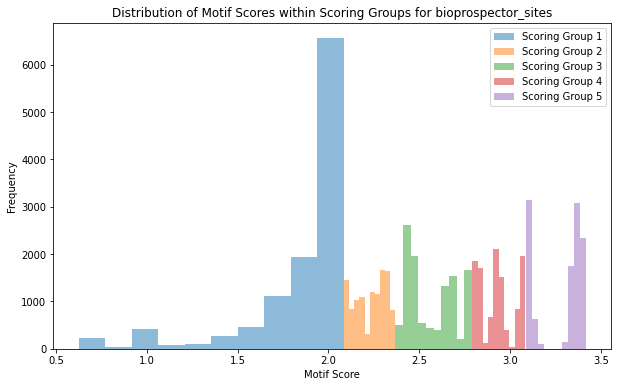

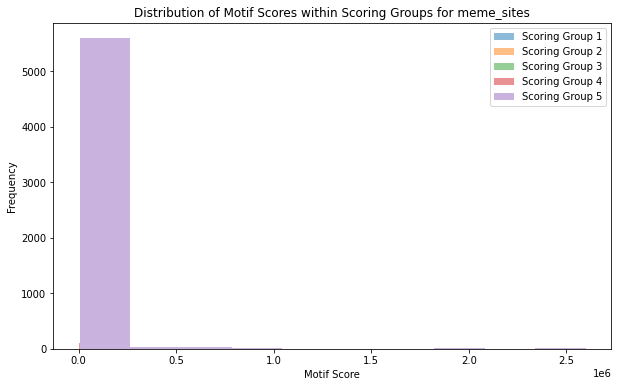

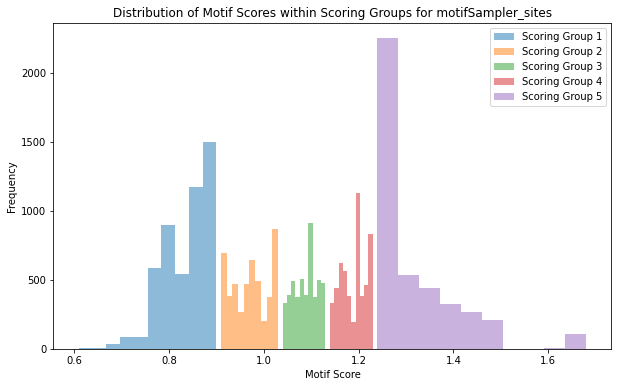

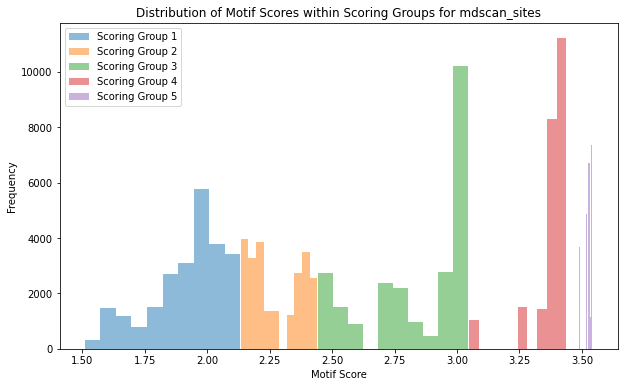

,File_name,Sequence_ID,Site,Score,Starting_position,Width,Score_group,Algorithm,Subgroup
0,CRP,4614744-4614762-forward,AATTGTGATGTGTAT,3.418,253.0,15.0,5,bioprospector,CRP_5_4614744-4614762-forward
1,CRP,3490065-3490083-reverse,ATTTTAAGAGGTGAT,3.418,193.0,15.0,5,bioprospector,CRP_5_3490065-3490083-reverse
2,CRP,702999-703017-forward,TATTGAGGTGAATAA,3.418,50.0,15.0,5,bioprospector,CRP_5_702999-703017-forward
3,CRP,702999-703017-forward,AAATTTAATTCGTAT,3.418,248.0,15.0,5,bioprospector,CRP_5_702999-703017-forward
4,CRP,702999-703017-forward,AATTGTACTGCCGAT,3.418,307.0,15.0,5,bioprospector,CRP_5_702999-703017-forward


In [29]:
stage1_dir = 'CSVs/stage_1/'

concatenated_df = group_collected_results(stage1_dir)
concatenated_df.to_csv('CSVs/grouping/Concatenated.csv', index=False)
concatenated_df.head()

In [30]:
print(concatenated_df.shape)


(227952, 9)


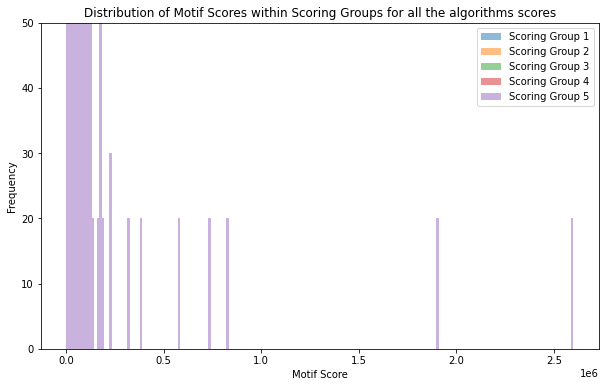

In [39]:
plt.figure(figsize=(10, 6))
for group, group_df in concatenated_df.groupby("Score_group"):
    plt.hist(group_df["Score"], bins=200, alpha=0.5, label=f"Scoring Group {group}")

plt.ylim(0, 50)
plt.xlabel("Motif Score")
plt.ylabel("Frequency")
plt.title("Distribution of Motif Scores within Scoring Groups for all the algorithms scores")
plt.legend()
plt.show()


## C. Voting-Smoothing and Extracting Phase

1. For each input sequence and each predicted site group, the number of predicted sites are summed position-wise (1 position = 1 vote)
2. The voting curve is smoothed using a sliding window of width = half the motif width (15)
3. For each input sequence the subsequence of total width 15 around the highest point of the voting curve is extracted
 as the final prediction

It is possible in this stage to select which algorithms to include in the voting scheme.

In [57]:
grouped_df = pd.read_csv('CSVs/grouping/Concatenated.csv')
grouped_df.shape

(227952, 9)

In [47]:
grouped_df['Algorithm'].unique()  # algorithm names to choose from

array(['bioprospector', 'meme', 'motifSampler', 'mdscan'], dtype=object)

### Voting

In [54]:
# Make a list with the algorithm names you wish to include in the voting phase
algs = grouped_df['Algorithm'].unique()
g_df = select_algorithms_to_vote(grouped_df, algs)
g_df.head()

In [58]:
g_df.shape

(227952, 10)

In [59]:
voting_results = calculate_voting_results(g_df)
voting_results.head()

Position,1,2,3,4,5,6,7,8,9,10,...,466,467,468,469,470,471,472,473,474,475
Subgroup,,,,,,,,,,,,,,,,,,,,,
Ada_1_209398-209425-forward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ada_1_2145603-2145630-reverse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ada_1_2308475-2308502-reverse,0.0,0.0,0.0,1.0,21.0,21.0,24.0,24.0,24.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ada_2_209398-209425-forward,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ada_2_2145603-2145630-reverse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
voting_results.to_csv(f'voting_{algs}.csv')

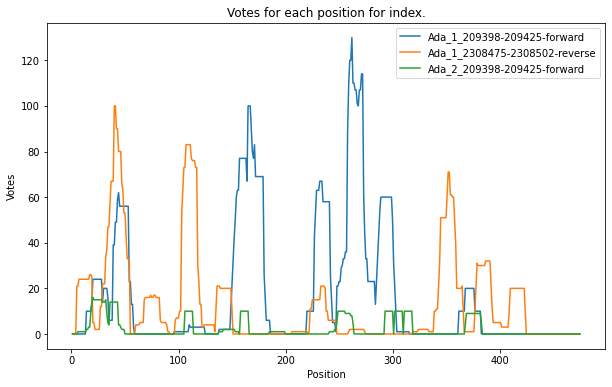

In [62]:
# Random indexes for plotting
index_to_plot = ['Ada_1_209398-209425-forward', 'Ada_1_2308475-2308502-reverse','Ada_2_209398-209425-forward']

plt.figure(figsize=(10, 6))

for index in index_to_plot:
    plt.plot(voting_results.columns, voting_results.loc[index], label=index)

plt.xlabel('Position')
plt.ylabel('Votes')
plt.title('Votes for each position for index.')
plt.legend()
plt.savefig(f'voting_{algs}.png')
plt.show()

### Smoothing

In [68]:
smoothed_results = apply_smoothing(g_df, 'Width', voting_results)

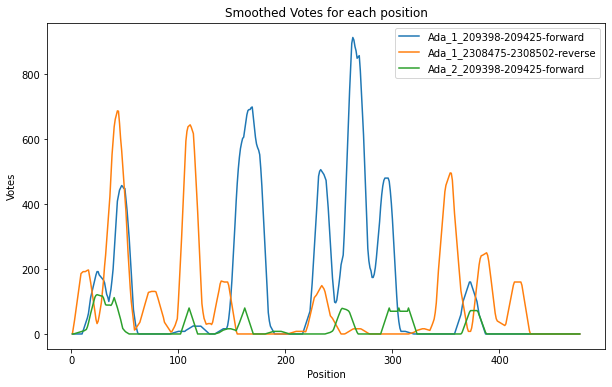

In [69]:
plt.figure(figsize=(10, 6))

for index in index_to_plot:
    plt.plot(smoothed_results.columns, smoothed_results.loc[index], label=index)

plt.xlabel('Position')
plt.ylabel('Votes')
plt.title('Smoothed Votes for each position')
plt.legend()
plt.savefig(f'smoothed_{algs}.png')
plt.show()

### Extraction

In [70]:
max_values_df = get_max_and_range(smoothed_results)
max_values_df.head()

,Position,Max_Value,Range
Subgroup,,,
Ada_1_209398-209425-forward,263,913.0,"(256, 257, 258, 259, 260, 261, 262, 263, 264, ..."
Ada_1_2145603-2145630-reverse,157,511.0,"(150, 151, 152, 153, 154, 155, 156, 157, 158, ..."
Ada_1_2308475-2308502-reverse,43,687.0,"(36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 4..."
Ada_2_209398-209425-forward,24,121.0,"(17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 2..."
Ada_2_2145603-2145630-reverse,386,96.0,"(379, 380, 381, 382, 383, 384, 385, 386, 387, ..."


In [83]:
max_values_df.to_csv(f'CSVs/extraction/positions_{algs}.csv')

#### Add predicted sites sequences

In [84]:
extraction_results_df = pd.read_csv(f'CSVs/extraction/positions_{algs}.csv')
extraction_results_df.head()

,Subgroup,Position,Max_Value,Range,Predicted_sequence
0,Ada_1_209398-209425-forward,263,913.0,"range(256, 271)",NaN
1,Ada_1_2145603-2145630-reverse,157,511.0,"range(150, 165)",NaN
2,Ada_1_2308475-2308502-reverse,43,687.0,"range(36, 51)",NaN
3,Ada_2_209398-209425-forward,24,121.0,"range(17, 32)",NaN
4,Ada_2_2145603-2145630-reverse,386,96.0,"range(379, 394)",NaN


In [85]:
dataset_path = os.path.join(os.getcwd(), 'Data/datasetB200')
added_sites_seq_df = add_predicted_site_sequence(extraction_results_df, dataset_path)

added_sites_seq_df.head()

,Subgroup,Position,Max_Value,Range,Predicted_sequence
0,Ada_1_209398-209425-forward,263,913.0,"range(256, 271)",CGAGTTCACGCCACG
1,Ada_1_2145603-2145630-reverse,157,511.0,"range(150, 165)",ATGGGTTCTGGTGGC
2,Ada_1_2308475-2308502-reverse,43,687.0,"range(36, 51)",GAAGCCGATGCCTGG
3,Ada_2_209398-209425-forward,24,121.0,"range(17, 32)",TAGGATTCTGAAGTG
4,Ada_2_2145603-2145630-reverse,386,96.0,"range(379, 394)",GCCCAACCCAATGTA


In [86]:
added_sites_seq_df.to_csv(f'CSVs/extraction/positions_{algs}_sites_seq.csv', index=False)

## D. Evaluation of results